In [15]:
%pip install pandas -q
%pip install numpy -q
%pip install scipy -q
%pip install scikit-learn -q
%pip install matplotlib -q
%pip install seaborn -q
%pip install openpyxl -q



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 

In [16]:
import pandas as pd
import numpy as np
import os
from scipy import optimize
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [17]:
df_constant_ccdi = pd.read_excel('master_df_constant_CCDi.xlsx')
df_constant_ccdiF = pd.read_excel('df_const_CCDiF.xlsx')
df_varTemp = pd.read_excel('master_df_varTemp.xlsx')

In [18]:
df_rates_K_ccdi = pd.read_excel('./df_rates_constant_CCDi.xlsx')
df_rates_K_ccdiF = pd.read_excel('./df_rates_constant_CCDiF.xlsx')
df_rates_varTemp = pd.read_excel('./df_rates_varTemp.xlsx')

In [19]:
colors = [  '#33BBEE', '#009988','#EE7733','#CC3311',]# '#BBBBBB'],
# Set your custom color palette

In [20]:
fnt=18

<Figure size 640x480 with 0 Axes>

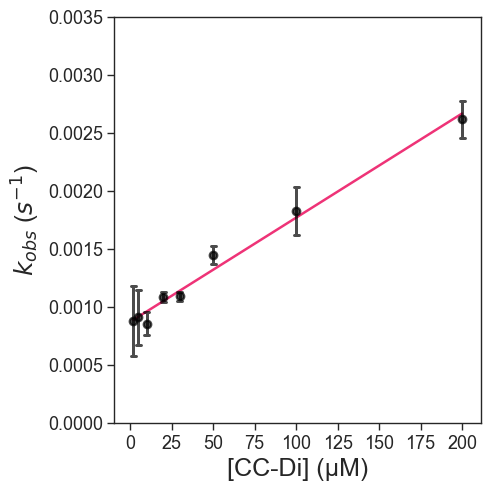

In [21]:
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0,(5,5))
sns.pointplot(data=df_rates_K_ccdiF,x='concDi',y='rate',errorbar='sd',
              native_scale=True,zorder=100,
              linestyles='',capsize=1,color='k',alpha=0.7)
sns.regplot(data=df_rates_K_ccdiF,x='concDi',y='rate',scatter=False,ci=None,
            color= '#EE3377')
plt.xticks(fontsize=fnt-5)
plt.yticks(fontsize=fnt-5)
plt.ylim(0,0.0035)
plt.xlabel('[CC-Di] (μM)',fontsize=fnt)
plt.ylabel('$k_{{obs}}$ ($s^{{-1}}$)',fontsize=fnt)

plt.tight_layout()
plt.savefig('Constant_unlabeled_CCDi.png',dpi=600)

In [22]:
plotdf = df_rates_K_ccdiF.copy()

In [23]:
plotdf = df_rates_K_ccdiF[df_rates_K_ccdiF['concDi']>5]

<Figure size 640x480 with 0 Axes>

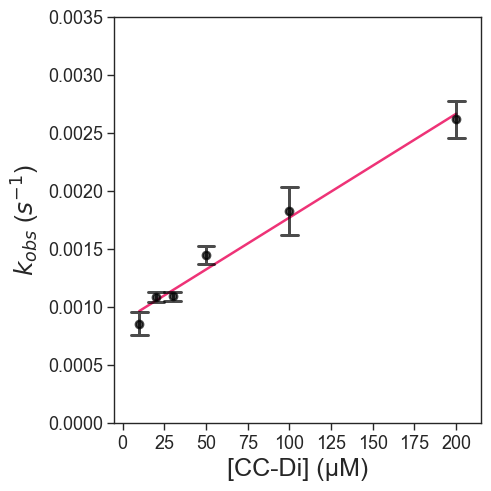

In [24]:
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0,(5,5))
sns.pointplot(data=plotdf,x='concDi',y='rate',errorbar='sd',
              native_scale=True,zorder=100,
              linestyles='',capsize=1,color='k',alpha=0.7)
sns.regplot(data=plotdf,x='concDi',y='rate',scatter=False,ci=None,
            color= '#EE3377')
plt.xticks(fontsize=fnt-5)
plt.yticks(fontsize=fnt-5)
plt.ylim(0,0.0035)
plt.xlabel('[CC-Di] (μM)',fontsize=fnt)
plt.ylabel('$k_{{obs}}$ ($s^{{-1}}$)',fontsize=fnt)

plt.tight_layout()
plt.savefig('Constant_unlabeled_CCDi_rmv_5.png',dpi=600)

In [25]:
df_rates_K_ccdiF['sqrt([Di])']=np.sqrt(df_rates_K_ccdiF['concDi'])

<Figure size 640x480 with 0 Axes>

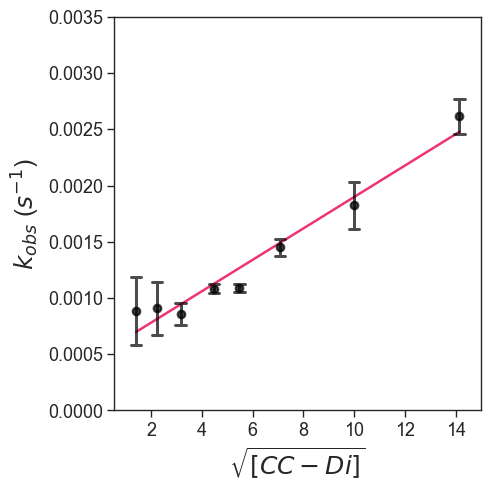

In [26]:
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0,(5,5))
sns.pointplot(data=df_rates_K_ccdiF,x='sqrt([Di])',y='rate',errorbar='sd',
              native_scale=True,zorder=100,
              linestyles='',capsize=0.5,color='k',alpha=0.7)
sns.regplot(data=df_rates_K_ccdiF,x='sqrt([Di])',y='rate',scatter=False,ci=None,color= '#EE3377')
plt.xticks(fontsize=fnt-5)
plt.yticks(fontsize=fnt-5)
plt.ylim(0,0.0035)

plt.xlabel('$\sqrt{[CC-Di]}$',fontsize=fnt)
plt.ylabel('$k_{{obs}}$ ($s^{{-1}}$)',fontsize=fnt)
plt.tight_layout()
plt.savefig('Constant_sqrt_unlabeled_CCDi.png',transparent=True,dpi=600)

<Figure size 640x480 with 0 Axes>

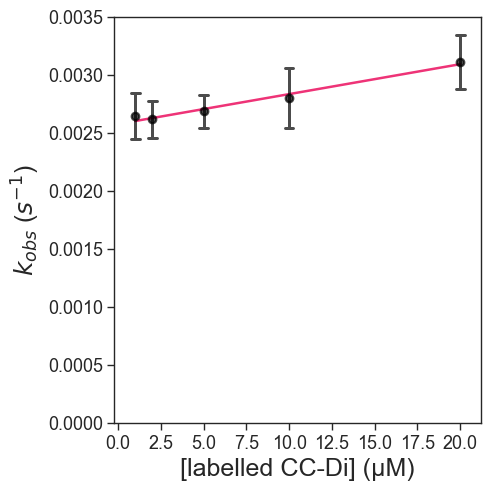

In [27]:
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0,(5,5))
sns.pointplot(data=df_rates_K_ccdi,x='concDiF',y='rate',errorbar='sd',
              native_scale=True,zorder=100,
              linestyles='',capsize=0.5,color='k',alpha=0.7)
sns.regplot(data=df_rates_K_ccdi,x='concDiF',y='rate',scatter=False,ci=None,color= '#EE3377')
plt.xticks(fontsize=fnt-5)
plt.yticks(fontsize=fnt-5)
plt.ylim(0,0.0035)

plt.xlabel('[labelled CC-Di] (μM)',fontsize=fnt)
plt.ylabel('$k_{{obs}}$ ($s^{{-1}}$)',fontsize=fnt)
plt.tight_layout()
plt.savefig('Constant_labelled_CCDi.png',transparent=True,dpi=600)

In [28]:
df_rates_K_ccdi['sqrt([DiF])']=np.sqrt(df_rates_K_ccdi['concDiF'])

<Figure size 640x480 with 0 Axes>

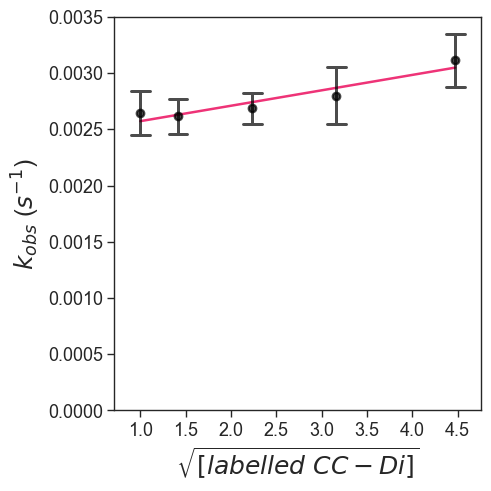

In [29]:
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0,(5,5))
sns.pointplot(data=df_rates_K_ccdi,x='sqrt([DiF])',y='rate',errorbar='sd',
              native_scale=True,zorder=100,
              linestyles='',capsize=0.5,color='k',alpha=0.7)
sns.regplot(data=df_rates_K_ccdi,x='sqrt([DiF])',y='rate',scatter=False,ci=None,color= '#EE3377')
plt.xticks(fontsize=fnt-5)
plt.yticks(fontsize=fnt-5)
plt.ylim(0,0.0035)

plt.xlabel('$\sqrt{[labelled \ CC-Di]}$',fontsize=fnt)
plt.ylabel('$k_{{obs}}$ ($s^{{-1}}$)',fontsize=fnt)
plt.tight_layout()
plt.savefig('Constant_sqrt_labelled_CCDi.png',transparent=True,dpi=600)

In [30]:
df_rates_varTemp['1/T']=1/(df_rates_varTemp['temp']+273.15)
df_rates_varTemp['lnk']=np.log(df_rates_varTemp['rate'])


In [32]:
df_rates_varTemp['1/T*1000']=df_rates_varTemp['1/T']*1000

<Figure size 640x480 with 0 Axes>

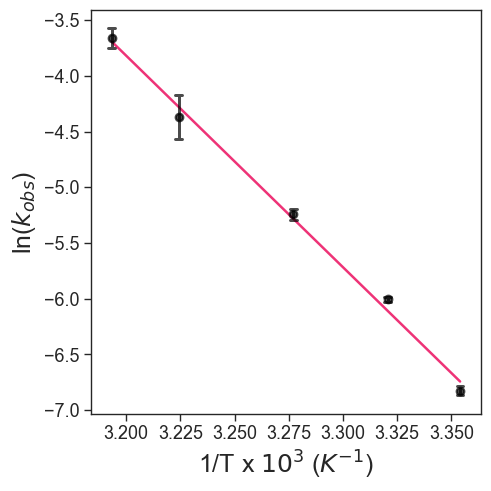

In [33]:
plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0,(5,5))
sns.pointplot(data=df_rates_varTemp,x='1/T*1000',y='lnk',errorbar='sd',
              native_scale=True,zorder=100,
              linestyles='',capsize=0.1,color='k',alpha=0.7)
sns.regplot(data=df_rates_varTemp,x='1/T*1000',y='lnk',scatter=False,ci=None,color='#EE3377')
plt.yticks(fontsize=fnt-5)
plt.xticks(fontsize=fnt-5)
#plt.ylim(0,0.0035)

plt.xlabel('1/T x $10^{{3}}$ ($K^{{-1}}$)',fontsize=fnt)
plt.ylabel('ln($k_{{obs}}$)',fontsize=fnt)
plt.tight_layout()
plt.savefig('Arhennius.png',dpi=600)

/var/folders/k0/7lzlp98x6c188pkk0rzbn2d40000gn/T/ipykernel_59014/3232492962.py:15: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=plot_df,x=xx,y=yy,errorbar='se',hue='concDi',


<Figure size 640x480 with 0 Axes>

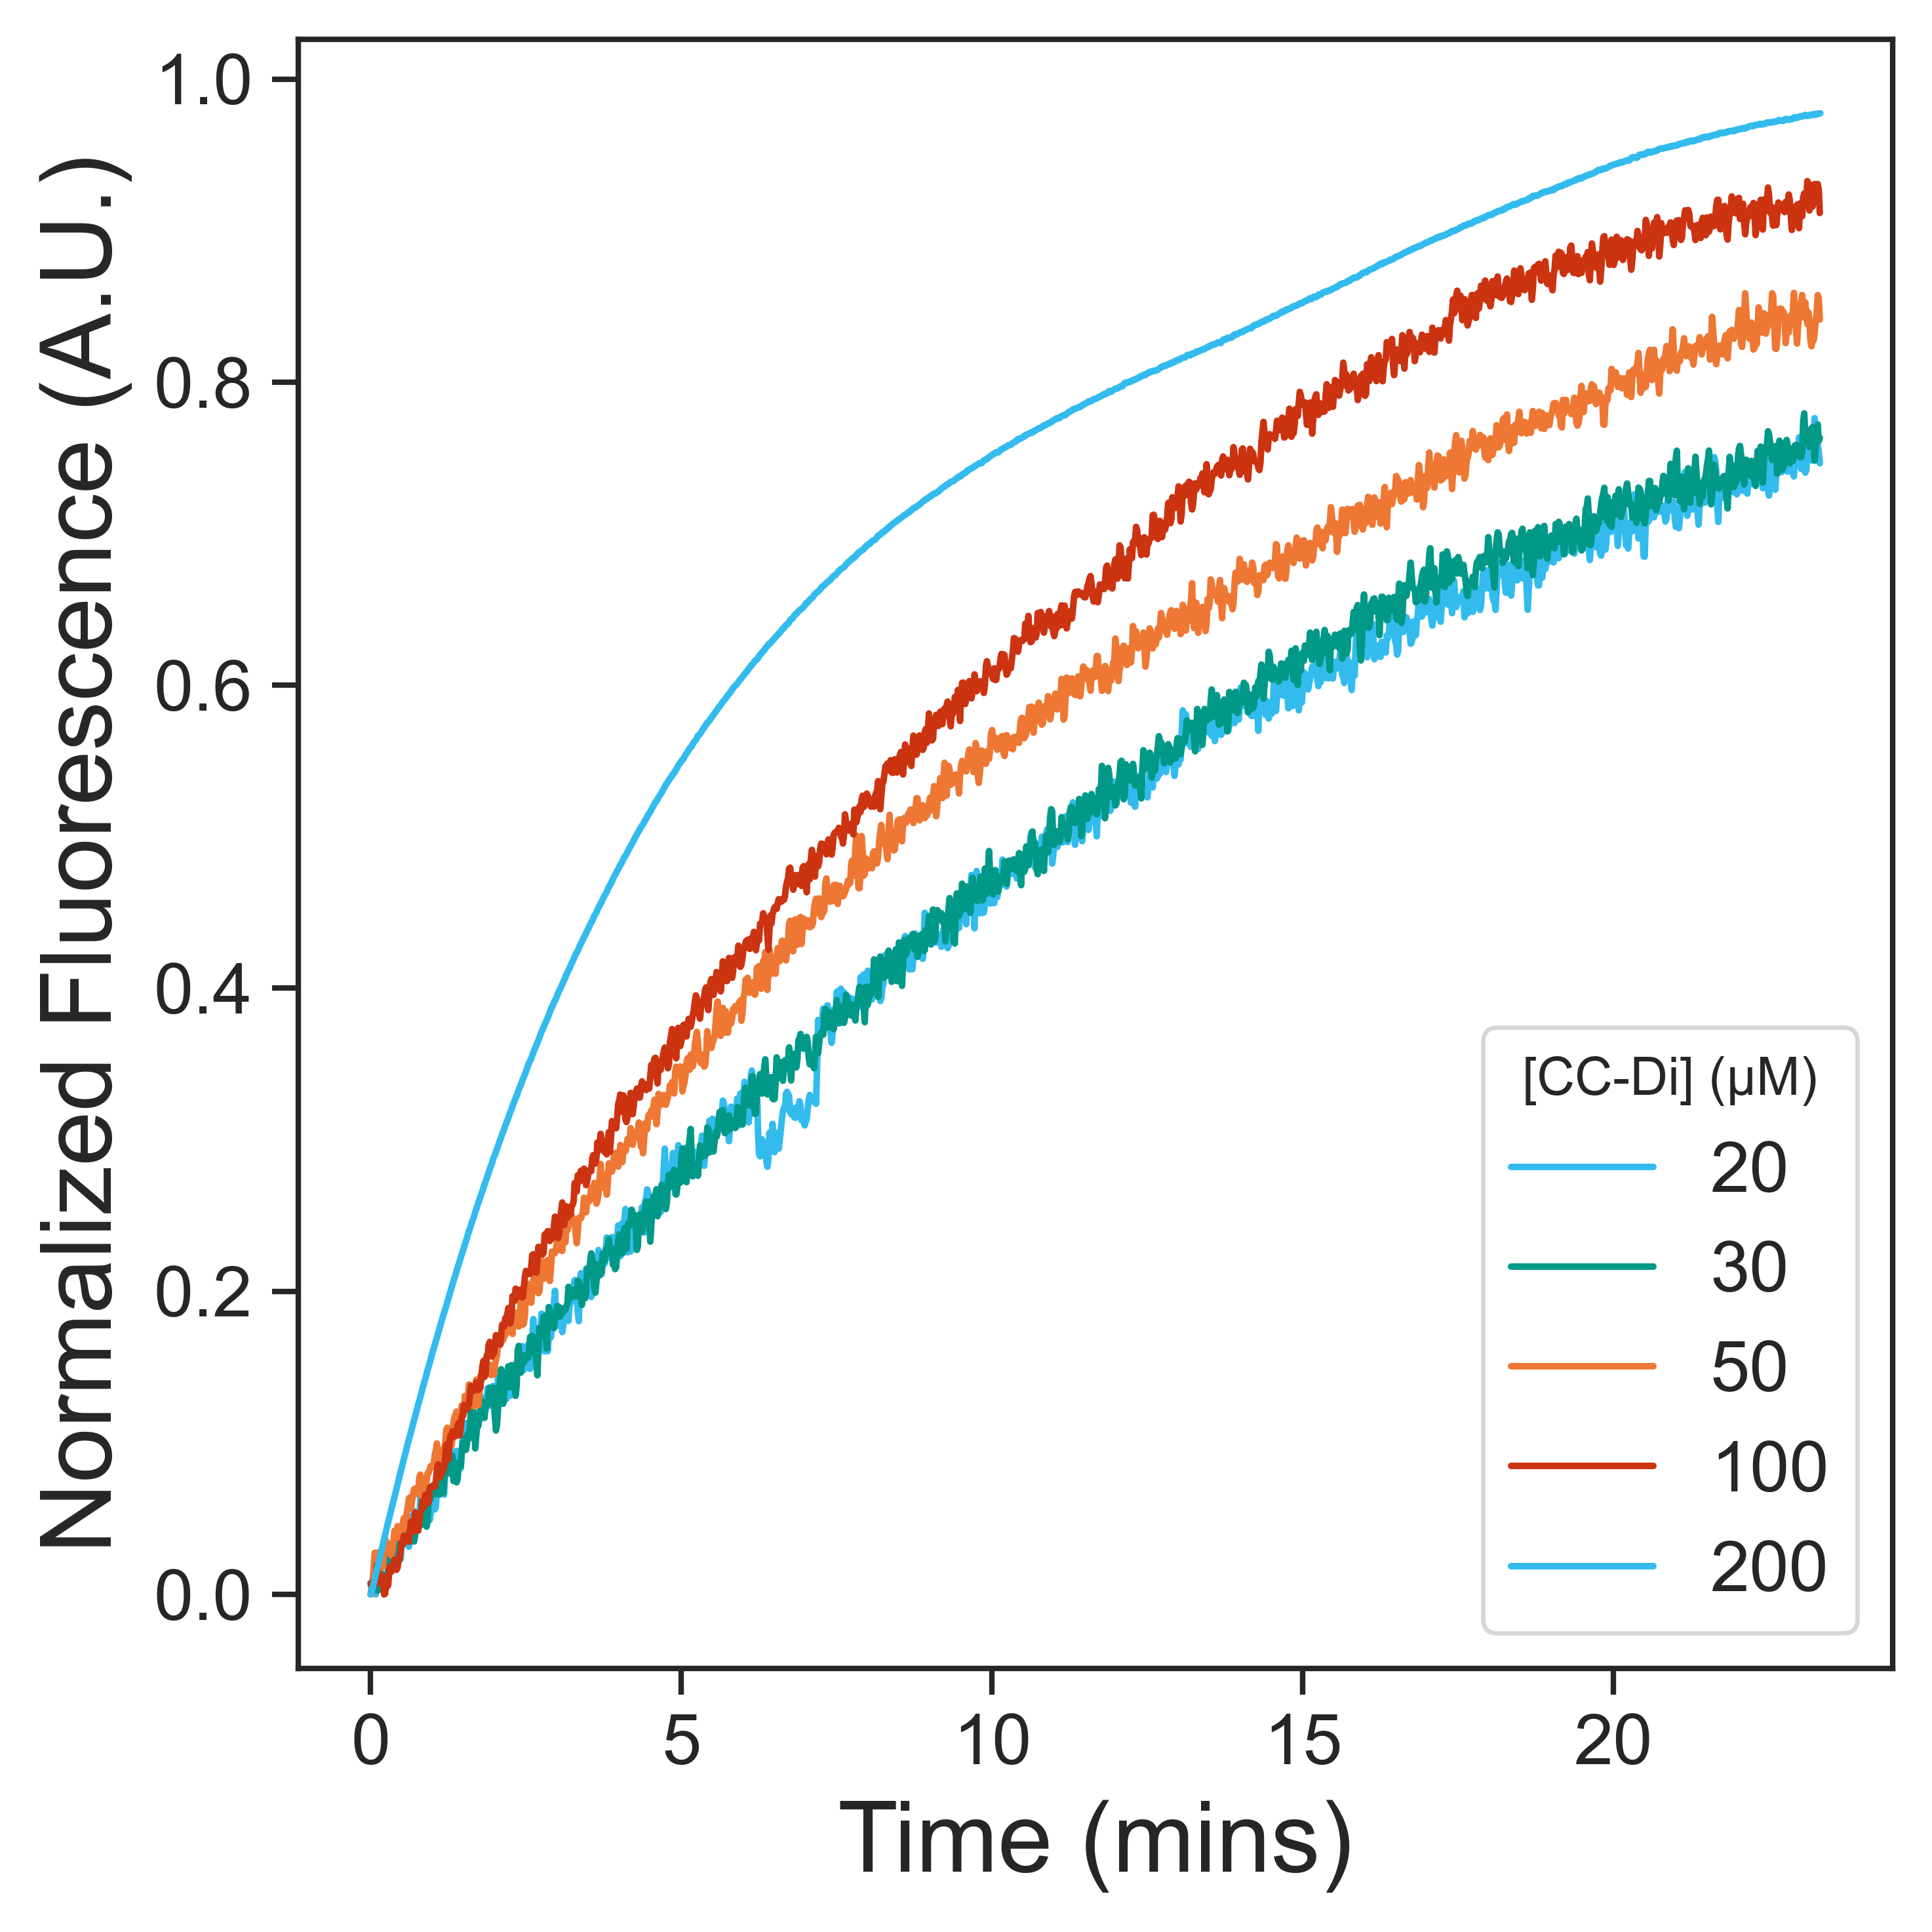

In [35]:
plot_df= df_constant_ccdiF[df_constant_ccdiF['concDi']>10]
plot_df=plot_df.sort_values('concDi')
plot_df['concDi']=plot_df['concDi'].astype(str)
plot_df=plot_df[plot_df['rep']==1]
plot_df=plot_df[plot_df['t0']<1400]
plot_df['tmin']=plot_df['t0']/60
plot_df['thr']=plot_df['tmin']/60
xx= 'tmin'
yy='Fnrm'

plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0,(5,5),dpi=600)
sns.lineplot(data=plot_df,x=xx,y=yy,errorbar='se',hue='concDi',
             palette=sns.color_palette(colors),alpha=1)
plt.xticks(fontsize=fnt-5)
plt.yticks(fontsize=fnt-5)

#plt.ylim(0,0.0035)

plt.legend( title="[CC-Di] (μM)",fontsize=fnt-5,
                    loc='lower right',  fancybox=True)
plt.xlabel('Time (mins)',fontsize=fnt)
plt.ylabel('Normalized Fluorescence (A.U.)',fontsize=fnt,)
plt.tight_layout()
plt.savefig('Timecourse_concentration_1rep.png',dpi=600)

In [36]:
colors = ['#0077BB', '#33BBEE', '#009988','#EE7733','#CC3311',]# '#BBBBBB'],
# Set your custom color palette

<Figure size 640x480 with 0 Axes>

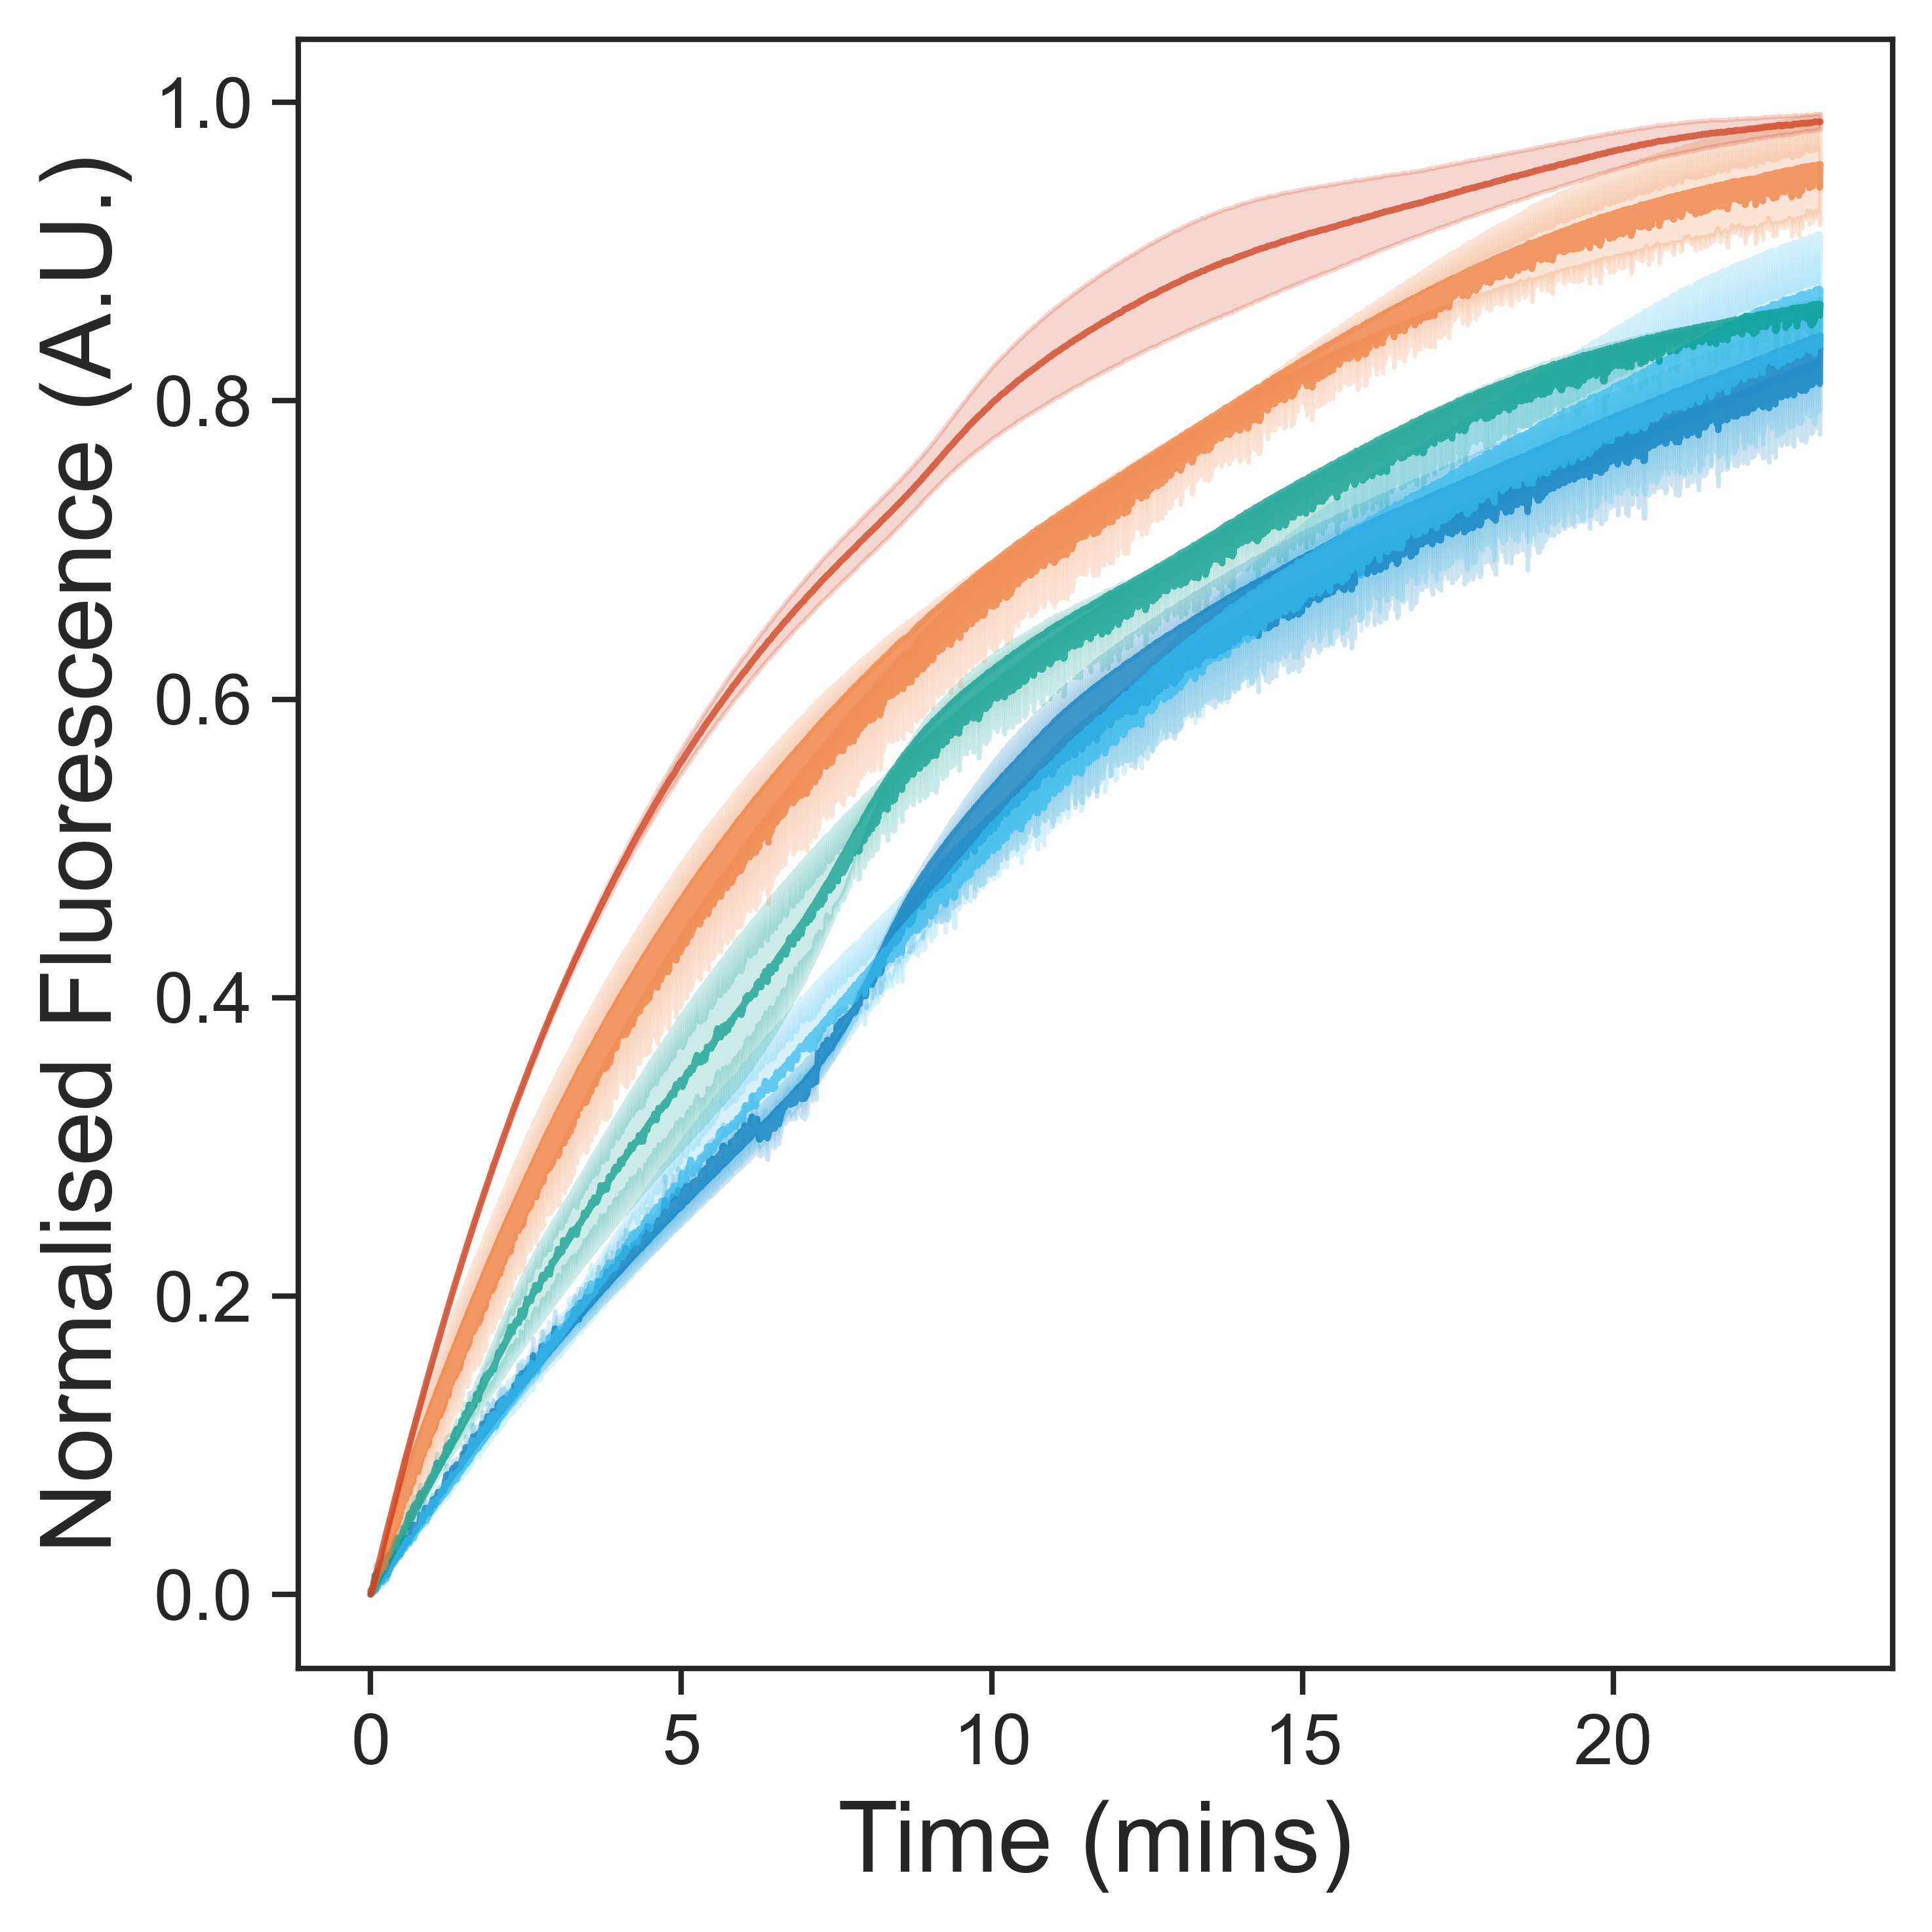

In [37]:
plot_df= df_constant_ccdiF[df_constant_ccdiF['concDi']>10]
plot_df=plot_df.sort_values('concDi')

plot_df['concDi']=plot_df['concDi'].astype(str)
plot_df=plot_df[plot_df['t0']<1400]
plot_df['tmin']=plot_df['t0']/60
plot_df['thr']=plot_df['tmin']/60
xx= 'tmin'
yy='Fnrm'


plt.clf()
sns.set_context('paper')
sns.set_style('ticks')
plt.figure(0,(5,5),dpi=600)
sns.lineplot(data=plot_df,x=xx,y=yy,errorbar='se',hue='concDi',
             palette=sns.color_palette(colors),alpha=0.7)
plt.xticks(fontsize=fnt-5)
plt.yticks(fontsize=fnt-5)
#plt.ylim(0,0.0035)
plt.legend('',frameon=False)
#plt.legend( title="[CC-Di] (μM)",fontsize=fnt-5,loc='lower right',  fancybox=True)
plt.xlabel('Time (mins)',fontsize=fnt)
plt.ylabel('Normalised Fluorescence (A.U.)',fontsize=fnt,)
plt.tight_layout()
plt.savefig('Timecourse_concentration_wo.png',dpi=600)

In [38]:
df_varTemp

,Unnamed: 0,t,F,temp,concDi,concDiF,rep,filepath,Fnrm,t0
0,0,40.0,291.562,32,20,2,1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.000000,0.0
1,1,40.5,292.202,32,20,2,1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.002790,0.5
2,2,41.0,292.779,32,20,2,1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.005305,1.0
3,3,41.5,293.422,32,20,2,1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.008107,1.5
4,4,42.0,294.026,32,20,2,1,./CCDi_data/Arhenius_files/Di_20uM_Di_4GF_2uM_...,0.010740,2.0
...,...,...,...,...,...,...,...,...,...,...
34338,34338,3248.0,463.092,25,20,2,2,./CCDi_data/Ratios/20_2/Di_20uM_Di_4GF_2uM_25d...,0.999060,3193.0
34339,34339,3248.5,463.115,25,20,2,2,./CCDi_data/Ratios/20_2/Di_20uM_Di_4GF_2uM_25d...,0.999152,3193.5
34340,34340,3249.0,463.249,25,20,2,2,./CCDi_data/Ratios/20_2/Di_20uM_Di_4GF_2uM_25d...,0.999691,3194.0
34341,34341,3249.5,463.316,25,20,2,2,./CCDi_data/Ratios/20_2/Di_20uM_Di_4GF_2uM_25d...,0.999960,3194.5


/var/folders/k0/7lzlp98x6c188pkk0rzbn2d40000gn/T/ipykernel_59014/2528311938.py:18: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(data=plot_df,x=xx,y=yy,errorbar='sd',hue='temp',


<Figure size 640x480 with 0 Axes>

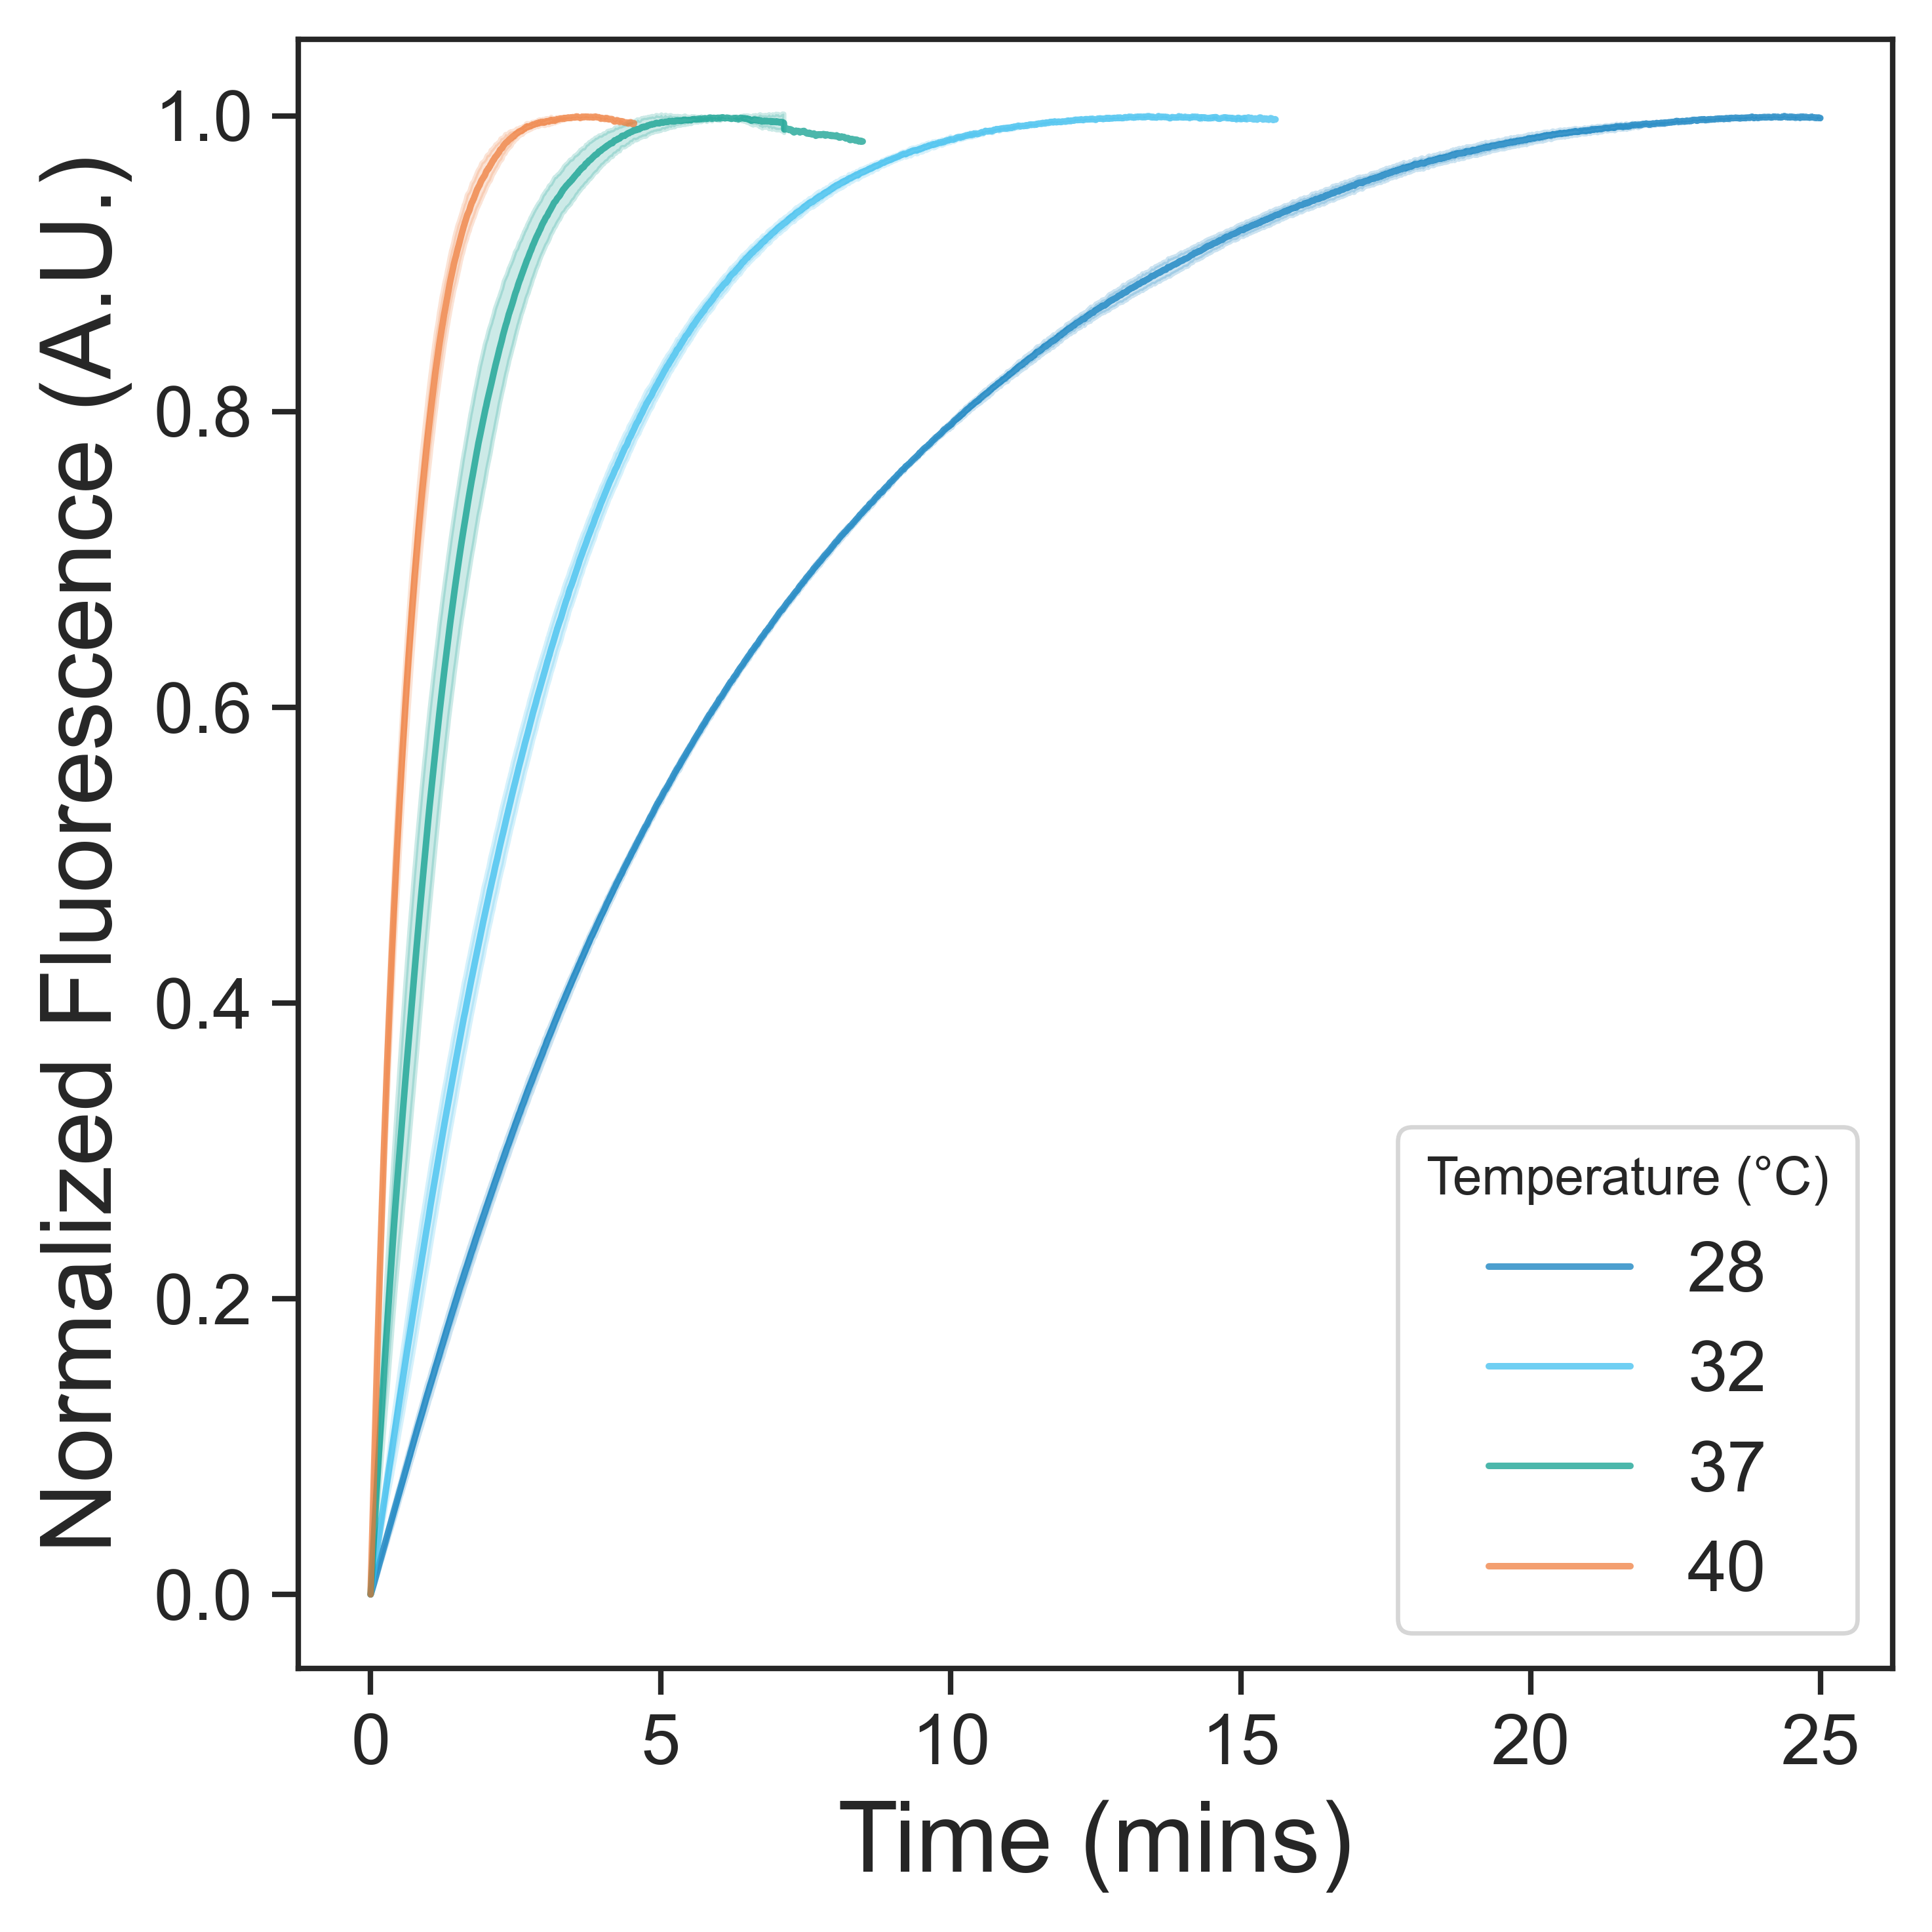

In [39]:
plot_df= df_varTemp.copy()
plot_df= plot_df[plot_df['temp']>25]
plot_df['temp']=plot_df['temp'].astype(str)
plot_df=plot_df.sort_values('temp')

plot_df=plot_df[plot_df['t0']<1500]
plot_df['tmin']=plot_df['t0']/60
plot_df['thr']=plot_df['tmin']/60
xx= 'tmin'
yy='Fnrm'
font_size=12

plt.clf()
sns.set_context('paper')
sns.set_style('ticks')

plt.figure(0,(5,5),dpi=600)
sns.lineplot(data=plot_df,x=xx,y=yy,errorbar='sd',hue='temp',
             palette=sns.color_palette(colors),alpha=0.7)
plt.xticks(fontsize=fnt-5)
plt.yticks(fontsize=fnt-5)
#plt.ylim(0,0.0035)

plt.legend( title="Temperature (°C)",fontsize=fnt-5,
                    loc='lower right', fancybox=True)
plt.xlabel('Time (mins)',fontsize=fnt)
plt.ylabel('Normalized Fluorescence (A.U.)',fontsize=fnt)
plt.tight_layout()
plt.savefig('Timecourse_temperature.png',dpi=600)

In [45]:
df_rates_K_ccdi.to_excel('./df_rates_constant_CCDi_2.xlsx')
df_rates_K_ccdiF.to_excel('./df_rates_constant_CCDiF_2.xlsx')